In [1]:
# Imports
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque


In [2]:
# Load the dataset (you uploaded an Excel file)
file_path = 'Facebook_Data.xlsx'  # Update this if the path changes

# Preview sheet names
xls = pd.ExcelFile(file_path)
print("Sheet names:", xls.sheet_names)

# Load the relevant sheet (assuming 'Edges' or similar)
df = pd.read_excel(xls, xls.sheet_names[0])
df.head()


Sheet names: ['Sheet1']


Unnamed: 0  Meredith Stransky    Brittney Mazzella    Yi Cook    \
0  Meredith Stransky                      0                    0          0   
1  Brittney Mazzella                      0                    0          0   
2            Yi Cook                      0                    0          0   
3     Porter Devries                      0                    0          0   
4   Suzanne Syverson                      0                    0          0   

   Porter Devries    Suzanne Syverson    Ladawn Creason    Mikel Lamberson    \
0                 0                   0                 0                  0   
1                 0                   0                 0                  0   
2                 0                   0                 0                  0   
3                 0                   0                 0                  1   
4                 0                   0                 0                  0   

   Lakendra Lasiter    Kate Shiver    ...  Tehmina  Happy Bacha  Younus  AVA  \
0                   0              0  ...        0            0       1    0   
1                   0              0  ...        0            0       0    1   
2                   1              0  ...        1            0       1    0   
3                   0              0  ...        0            0       0    0   
4                   0              1  ...        1            0       0    1   

   Alfred  Danish  Matloob  Sameed Shahzad  Frazer  Mubashir  
0       0       0        0               0       0         0  
1       1       0        0               0       1         0  
2       0       0        0               0       0         0  
3       0       0        0               0       0         0  
4       0       0        0               0       0         0  

[5 rows x 1001 columns]

In [6]:
# Step 1: Load the data
df = pd.read_excel("Facebook_Data.xlsx")

# Step 2: Set the first column as index (user names)
df.set_index(df.columns[0], inplace=True)

# Step 3: Convert column and index names to strings and strip whitespace
df.columns = df.columns.astype(str).str.strip()
df.index = df.index.astype(str).str.strip()

# Step 4: Build edge list from adjacency matrix
edges = []

for row_user in df.index:
    for col_user in df.columns:
        if df.loc[row_user, col_user] == 1:  # if there's a connection
            edges.append((row_user, col_user))

# Step 5: Remove duplicate edges (since it's undirected)
unique_edges = set()
for u, v in edges:
    if (v, u) not in unique_edges:
        unique_edges.add((u, v))

# Convert to DataFrame
df_clean = pd.DataFrame(unique_edges, columns=['user1', 'user2'])
df_clean.head()



user1                user2
0    Syed Kashif              Jackson
1        Rebbeca  Muzayin Abdul Wahab
2  Ghulam Rasool                Teddy
3        Stanley           Toni Togar
4        Sufiyan              Stanley

In [7]:
# Build Adjacency List
adj_list = {}
for _, row in df_clean.iterrows():
    u, v = row['user1'], row['user2']
    adj_list.setdefault(u, []).append(v)
    adj_list.setdefault(v, []).append(u)


In [8]:
print("Number of connections per user:")
for user, friends in adj_list.items():
    print(f"{user}: {len(friends)} connections")


Number of connections per user:
Syed Kashif: 93 connections
Jackson: 105 connections
Rebbeca: 93 connections
Muzayin Abdul Wahab: 116 connections
Ghulam Rasool: 95 connections
Teddy: 95 connections
Stanley: 87 connections
Toni Togar: 111 connections
Sufiyan: 98 connections
Lucy: 112 connections
Riaz Ansari: 89 connections
Issac Montas: 101 connections
Shoaib: 87 connections
Marco: 117 connections
Hamayun Zubair: 89 connections
Ladawn Creason: 100 connections
Madeleine: 94 connections
Hugo: 107 connections
Asad Ali: 99 connections
Freya: 83 connections
Rorry: 92 connections
Shahzad Rasheed: 93 connections
Malik Tayyab: 109 connections
Ali Ahmad: 95 connections
Anthony: 100 connections
Finn: 90 connections
Alidha: 105 connections
Jonathan: 102 connections
Frieda: 92 connections
Phoebe: 100 connections
Saif: 106 connections
Alton Towell: 105 connections
Marcelo: 108 connections
Adela Babst: 79 connections
Hanna: 105 connections
Keely: 96 connections
Alina: 95 connections
Abdullah Sungkar:

In [9]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start)
    for neighbor in graph.get(start, []):
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    return visited

# Example usage:
print("DFS from 'Stanley':")
dfs(adj_list, "Stanley")


DFS from 'Stanley':
Stanley
Toni Togar
Sami Satti
Umair Hassan
Ahmed
Beth Walraven
Bailey
Daphine Lynn
Yousaf
Leaon
Malik Belawal
Nuala
Jonah
Tommy
Gabriel
Eden
Malik Tayyab
Shahzad Rasheed
Ezad Khan
Hussain
Louis
William
Tehmina
Nabeeha
Muzayin Abdul Wahab
Rebbeca
Indie
Shahnawaz
Leona
Hina
Raja Imran Zafar
Jaazib
Aurangzaib
Affaan
Sundas
Irfan
Isobelle
Thatcher
Umar
Imam Samudra
Ella
Felic
Abdul Rauf
Cholily
Madeleine
Ladawn Creason
Lacie
Aziz ur Rehman
Jahangir
Natalie
Son Hadi
Antony
Christopher
Harman
Arwen
Mazan Hoot
Alfred
Shayan
Sylvia
Noki Dada
Katherine
Luke
Jayden
Aslam
Geaorge
Zulfiqar
Saqib Butt
Abdullah Abid
Eihanna
Sibgha
Adela Babst
Hanna
Leika
Aneeqa Tanveer
Kieran
Zeehsan Ahmed
Jameela
Mehboob Sain
Azam Rumi
Miya
Rio
Heri Sigu Samboja
Iqbal
Ollie
Gohar Ahmed Zai
Daniella
Shannon
Saif Ali
Maroof
Rohail
Saleem Ahmed
Asad Ali
Hugo
Rohan
Alina
Keely
Qotadah
Louisa
Syed Kashif
Jackson
Mariyam
Carmen
Waseem
Nicole
Lema
Levi
Darcey
Sarah Batool
Raza Muhammadi
Zahid
Isco
Abdu

{'Adam',
 'Verity',
 'Arthur',
 'Akhtar Munir',
 'Zaib Khan',
 'Malik Farooq',
 'Malcum',
 'Zubaila',
 'Saqib',
 'Muhammad Usama',
 'Imad',
 'Mathew Perry',
 'Brittney Mazzella',
 'Alidha',
 "Mus'ab Sahidi",
 'Nicholas',
 'Tamala',
 'Alvaro',
 'Kiran',
 'Aiza',
 'Ronnie',
 'Gabriel',
 "Abu Bakar Ba'asyir",
 'Sylvia',
 'Andleeb',
 'Hermione',
 'Mehak',
 'Shazi harry',
 'Ishku Ishku',
 'Muskaan',
 'Khurrum Gill',
 'Zoe',
 'Lexie',
 'Tu Viloria',
 'Tanveer',
 'Maddison',
 'Khushi',
 'Daniella',
 'Eve',
 'Arisha',
 'Lilly',
 'Muhib Awais',
 'Nadiya',
 'Oscar',
 'Hamza Mehar',
 'Reid',
 'Khubain Ahsan',
 'Hanna',
 'Jonathan',
 'Dililah',
 ':ibbie',
 'Jabir',
 'Christopher',
 'Meredith Stransky',
 'Lacie',
 'Zia Khan',
 'Irum',
 'Kamal Kami',
 'Ali Ahmad',
 'Miley',
 'Shahzada Asad',
 'Jamie',
 'Abdullah Sungkar',
 'Katty',
 'Danuta Caylor',
 'Bilaal',
 'Aleena',
 'Fatima',
 'Aquib',
 'Felic',
 'Muchtar',
 'Dennis',
 'Spencer',
 'Jakub',
 'Hailey',
 'Ahmed Naqash',
 'James',
 'Murk Latif',
 

In [43]:
import time

def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for neighbor in graph.get(start, []):
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    return visited

# Measure time to explore full network using DFS
start_time = time.time()

all_visited = set()
components = []  # Optional: to store all connected groups
for user in adj_list:
    if user not in all_visited:
        component = dfs(adj_list, user)
        all_visited.update(component)
        components.append(component)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total users found: {len(all_visited)}")
print(f"Total connected components: {len(components)}")
print(f"Time taken: {elapsed_time:.4f} seconds")


Total users found: 1000
Total connected components: 1
Time taken: 0.0050 seconds


In [10]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)
    
    while queue:
        current = queue.popleft()
        print(current)
        for neighbor in graph.get(current, []):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    return visited

# Example usage:
print("BFS from 'Stanley':")
bfs(adj_list, "Stanley")


BFS from 'Stanley':
Stanley
Toni Togar
Sufiyan
Hamayun Zubair
Wasil
Huma
Hassan Gull
Alliya
Homer
Charles
Mohamed Rais
Yaqoob
Nathaniel
Ollie
Akram
Usman Ghani
Orla
Miya
Hamza Rehman
Taha Sheikh
Muhammad Usama
Sebastian
Terrance Langone
Aziz ur Rehman
Megan
Floyd Robinett
Arshiya
Annie
Saeed
Bradley
Matthew
Gabriela
Muzayin Abdul Wahab
Ghulam Rasool
Nusrat Khan
Amir
Azhari Husin
Younus
Usman Kazi
Naveed
Season Follmer
Sarwar
Meredith Stransky
Wajahat
Zia Khan
Aaron
Geaorge
Maroof
Sleem Savi
Abbie
Sara
tillie
Kayden
Violet
Rorry
Declan
Kyran
Gohar Ahmed Zai
Scarlet
Liberty
Aneela
Saptono
Jordi Alba
Bella
Saskia
William
Muhammad Usman
Destor
Faizy Yar
Xavier
Jarryullah
Umair Khan
Hailey
Monica
Shehrooz
Celeste Hollenbach
Mukhtar Ahmed
Joshua
Harman
Robbie
Akhtar Munir
Georgina
Michelle
Shahzaib Jutt
Amman
Nasir Abas
Engr Sid Awan
Ronnie
Sami Satti
Shemeka
Ajengan Masduki
Hasnat Ahmed Khan
Daphine Lynn
Luka
Felic
Beth Walraven
Janu ki Jaan
Zachary
Mohamed Saifuddin
Thatcher
Maria
Ghulam H

{'Verity',
 'Akhtar Munir',
 'Arthur',
 'Adam',
 'Zaib Khan',
 'Malik Farooq',
 'Saqib',
 'Malcum',
 'Zubaila',
 'Muhammad Usama',
 'Imad',
 'Mathew Perry',
 'Brittney Mazzella',
 'Aiza',
 'Alidha',
 'Nicholas',
 'Tamala',
 'Alvaro',
 'Kiran',
 "Mus'ab Sahidi",
 'Ronnie',
 'Gabriel',
 "Abu Bakar Ba'asyir",
 'Zoe',
 'Sylvia',
 'Musarrat',
 'Mehak',
 'Ishku Ishku',
 'Shazi harry',
 'Tanveer',
 'Khurrum Gill',
 'Andleeb',
 'Lexie',
 'Tu Viloria',
 'Muskaan',
 'Eve',
 'Khushi',
 'Maddison',
 'Arisha',
 'Daniella',
 'Lilly',
 'Muhib Awais',
 'Nadiya',
 'Oscar',
 'Khubain Ahsan',
 'Hamza Mehar',
 'Reid',
 'Jonathan',
 'Dililah',
 'Hanna',
 ':ibbie',
 'Jabir',
 'Christopher',
 'Meredith Stransky',
 'Lacie',
 'Zia Khan',
 'Irum',
 'Kamal Kami',
 'Miley',
 'Ali Ahmad',
 'Shahzada Asad',
 'Jamie',
 'Abdullah Sungkar',
 'Katty',
 'Danuta Caylor',
 'Bilaal',
 'Aleena',
 'Fatima',
 'Aquib',
 'Felic',
 'Muchtar',
 'James',
 'Ahmed Naqash',
 'Jakub',
 'Hailey',
 'Spencer',
 'Dennis',
 'Murk Latif',
 

In [42]:
from collections import deque
import time

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    visited.add(start)
    
    while queue:
        current = queue.popleft()
        for neighbor in graph.get(current, []):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    return visited

# Measure time to explore full network
start_time = time.time()

all_visited = set()
components = []  # Optional: to store all connected groups
for user in adj_list:
    if user not in all_visited:
        component = bfs(adj_list, user)
        all_visited.update(component)
        components.append(component)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Total users found: {len(all_visited)}")
print(f"Total connected components: {len(components)}")
print(f"Time taken: {elapsed_time:.4f} seconds")


Total users found: 1000
Total connected components: 1
Time taken: 0.0046 seconds


In [11]:
def find_friends(user):
    return adj_list.get(user, [])

# Example usage:
print("Friends of 'Stanley':", find_friends("Stanley"))


Friends of 'Stanley': ['Toni Togar', 'Sufiyan', 'Hamayun Zubair', 'Wasil', 'Huma', 'Hassan Gull', 'Alliya', 'Homer', 'Charles', 'Mohamed Rais', 'Yaqoob', 'Nathaniel', 'Ollie', 'Akram', 'Usman Ghani', 'Orla', 'Miya', 'Hamza Rehman', 'Taha Sheikh', 'Muhammad Usama', 'Sebastian', 'Terrance Langone', 'Aziz ur Rehman', 'Megan', 'Floyd Robinett', 'Arshiya', 'Annie', 'Saeed', 'Bradley', 'Matthew', 'Gabriela', 'Muzayin Abdul Wahab', 'Ghulam Rasool', 'Nusrat Khan', 'Amir', 'Azhari Husin', 'Younus', 'Usman Kazi', 'Naveed', 'Season Follmer', 'Sarwar', 'Meredith Stransky', 'Wajahat', 'Zia Khan', 'Aaron', 'Geaorge', 'Maroof', 'Sleem Savi', 'Abbie', 'Sara', 'tillie', 'Kayden', 'Violet', 'Rorry', 'Declan', 'Kyran', 'Gohar Ahmed Zai', 'Scarlet', 'Liberty', 'Aneela', 'Saptono', 'Jordi Alba', 'Bella', 'Saskia', 'William', 'Muhammad Usman', 'Destor', 'Faizy Yar', 'Xavier', 'Jarryullah', 'Umair Khan', 'Hailey', 'Monica', 'Shehrooz', 'Celeste Hollenbach', 'Mukhtar Ahmed', 'Joshua', 'Harman', 'Robbie', 'Akh

In [12]:
def find_friends_of_friends(user):
    direct_friends = set(adj_list.get(user, []))
    fof = set()
    for friend in direct_friends:
        fof.update(adj_list.get(friend, []))
    fof.discard(user)
    fof -= direct_friends  # Exclude direct friends
    return list(fof)

# Example usage:
print("Friends of friends of 'Stanley':", find_friends_of_friends("Stanley"))


Friends of friends of 'Stanley': ['Arthur', 'Verity', 'Adam', 'Zaib Khan', 'Malcum', 'Saqib', 'Zubaila', 'Malik Farooq', 'Imad', 'Mathew Perry', 'Brittney Mazzella', 'Alidha', "Mus'ab Sahidi", 'Tamala', 'Aiza', 'Alvaro', 'Kiran', 'Nicholas', 'Gabriel', "Abu Bakar Ba'asyir", 'Shazi harry', 'Zoe', 'Mehak', 'Sylvia', 'Ishku Ishku', 'Hermione', 'Muskaan', 'Khurrum Gill', 'Tanveer', 'Lexie', 'Tu Viloria', 'Maddison', 'Eve', 'Daniella', 'Arisha', 'Khushi', 'Lilly', 'Muhib Awais', 'Nadiya', 'Hamza Mehar', 'Oscar', 'Khubain Ahsan', 'Dililah', 'Hanna', 'Jonathan', 'Reid', ':ibbie', 'Jabir', 'Christopher', 'Lacie', 'Irum', 'Kamal Kami', 'Miley', 'Ali Ahmad', 'Shahzada Asad', 'Jamie', 'Abdullah Sungkar', 'Katty', 'Danuta Caylor', 'Bilaal', 'Aleena', 'Fatima', 'Aquib', 'Felic', 'Muchtar', 'James', 'Dennis', 'Jakub', 'Ahmed Naqash', 'Spencer', 'Keirra', 'Murk Latif', 'Sohail', 'Lauren', 'Asifa', 'Oliver', 'Khurrum Shehzad', 'Marcelo', 'Edgar', 'Jenson', 'Achmad Hasan', 'Tommy', 'Jayden', 'Heri Sigu

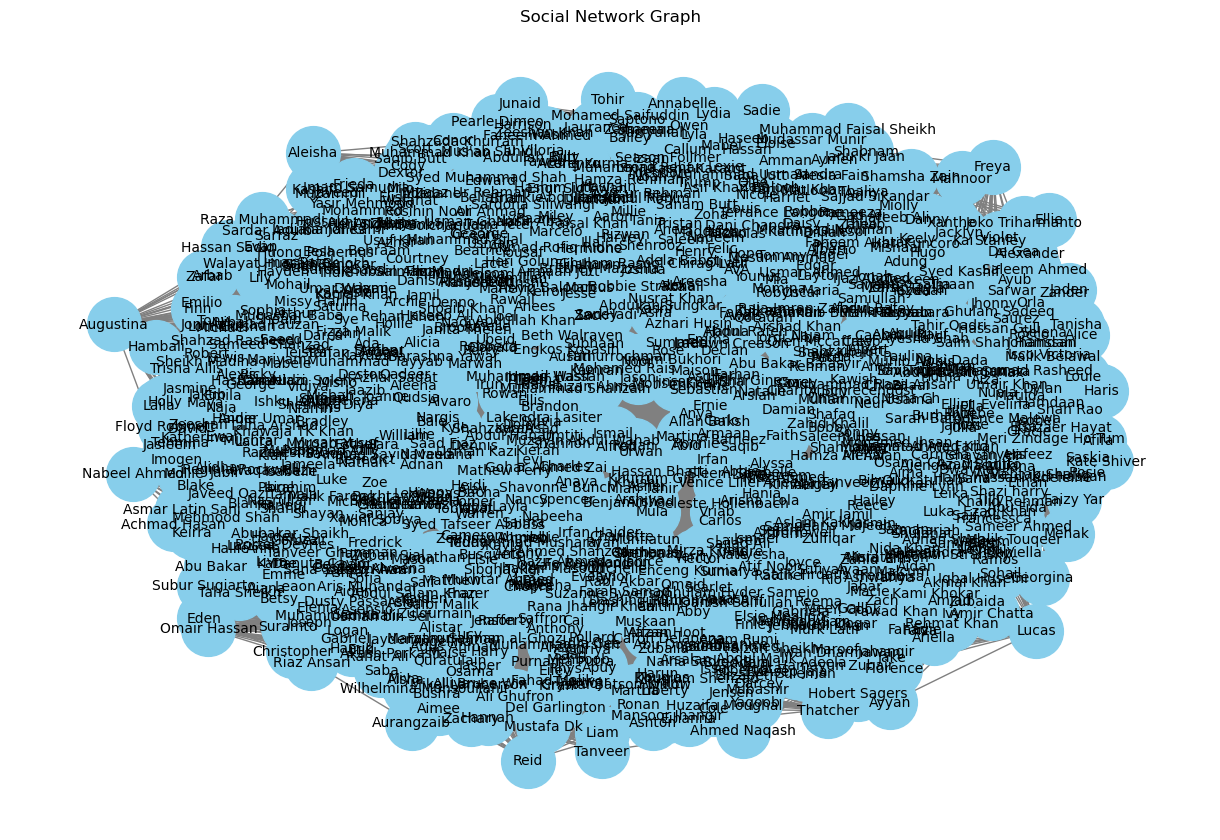

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for u, neighbors in adj_list.items():
    for v in neighbors:
        G.add_edge(u, v)

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, font_size=10)
plt.title("Social Network Graph")
plt.show()


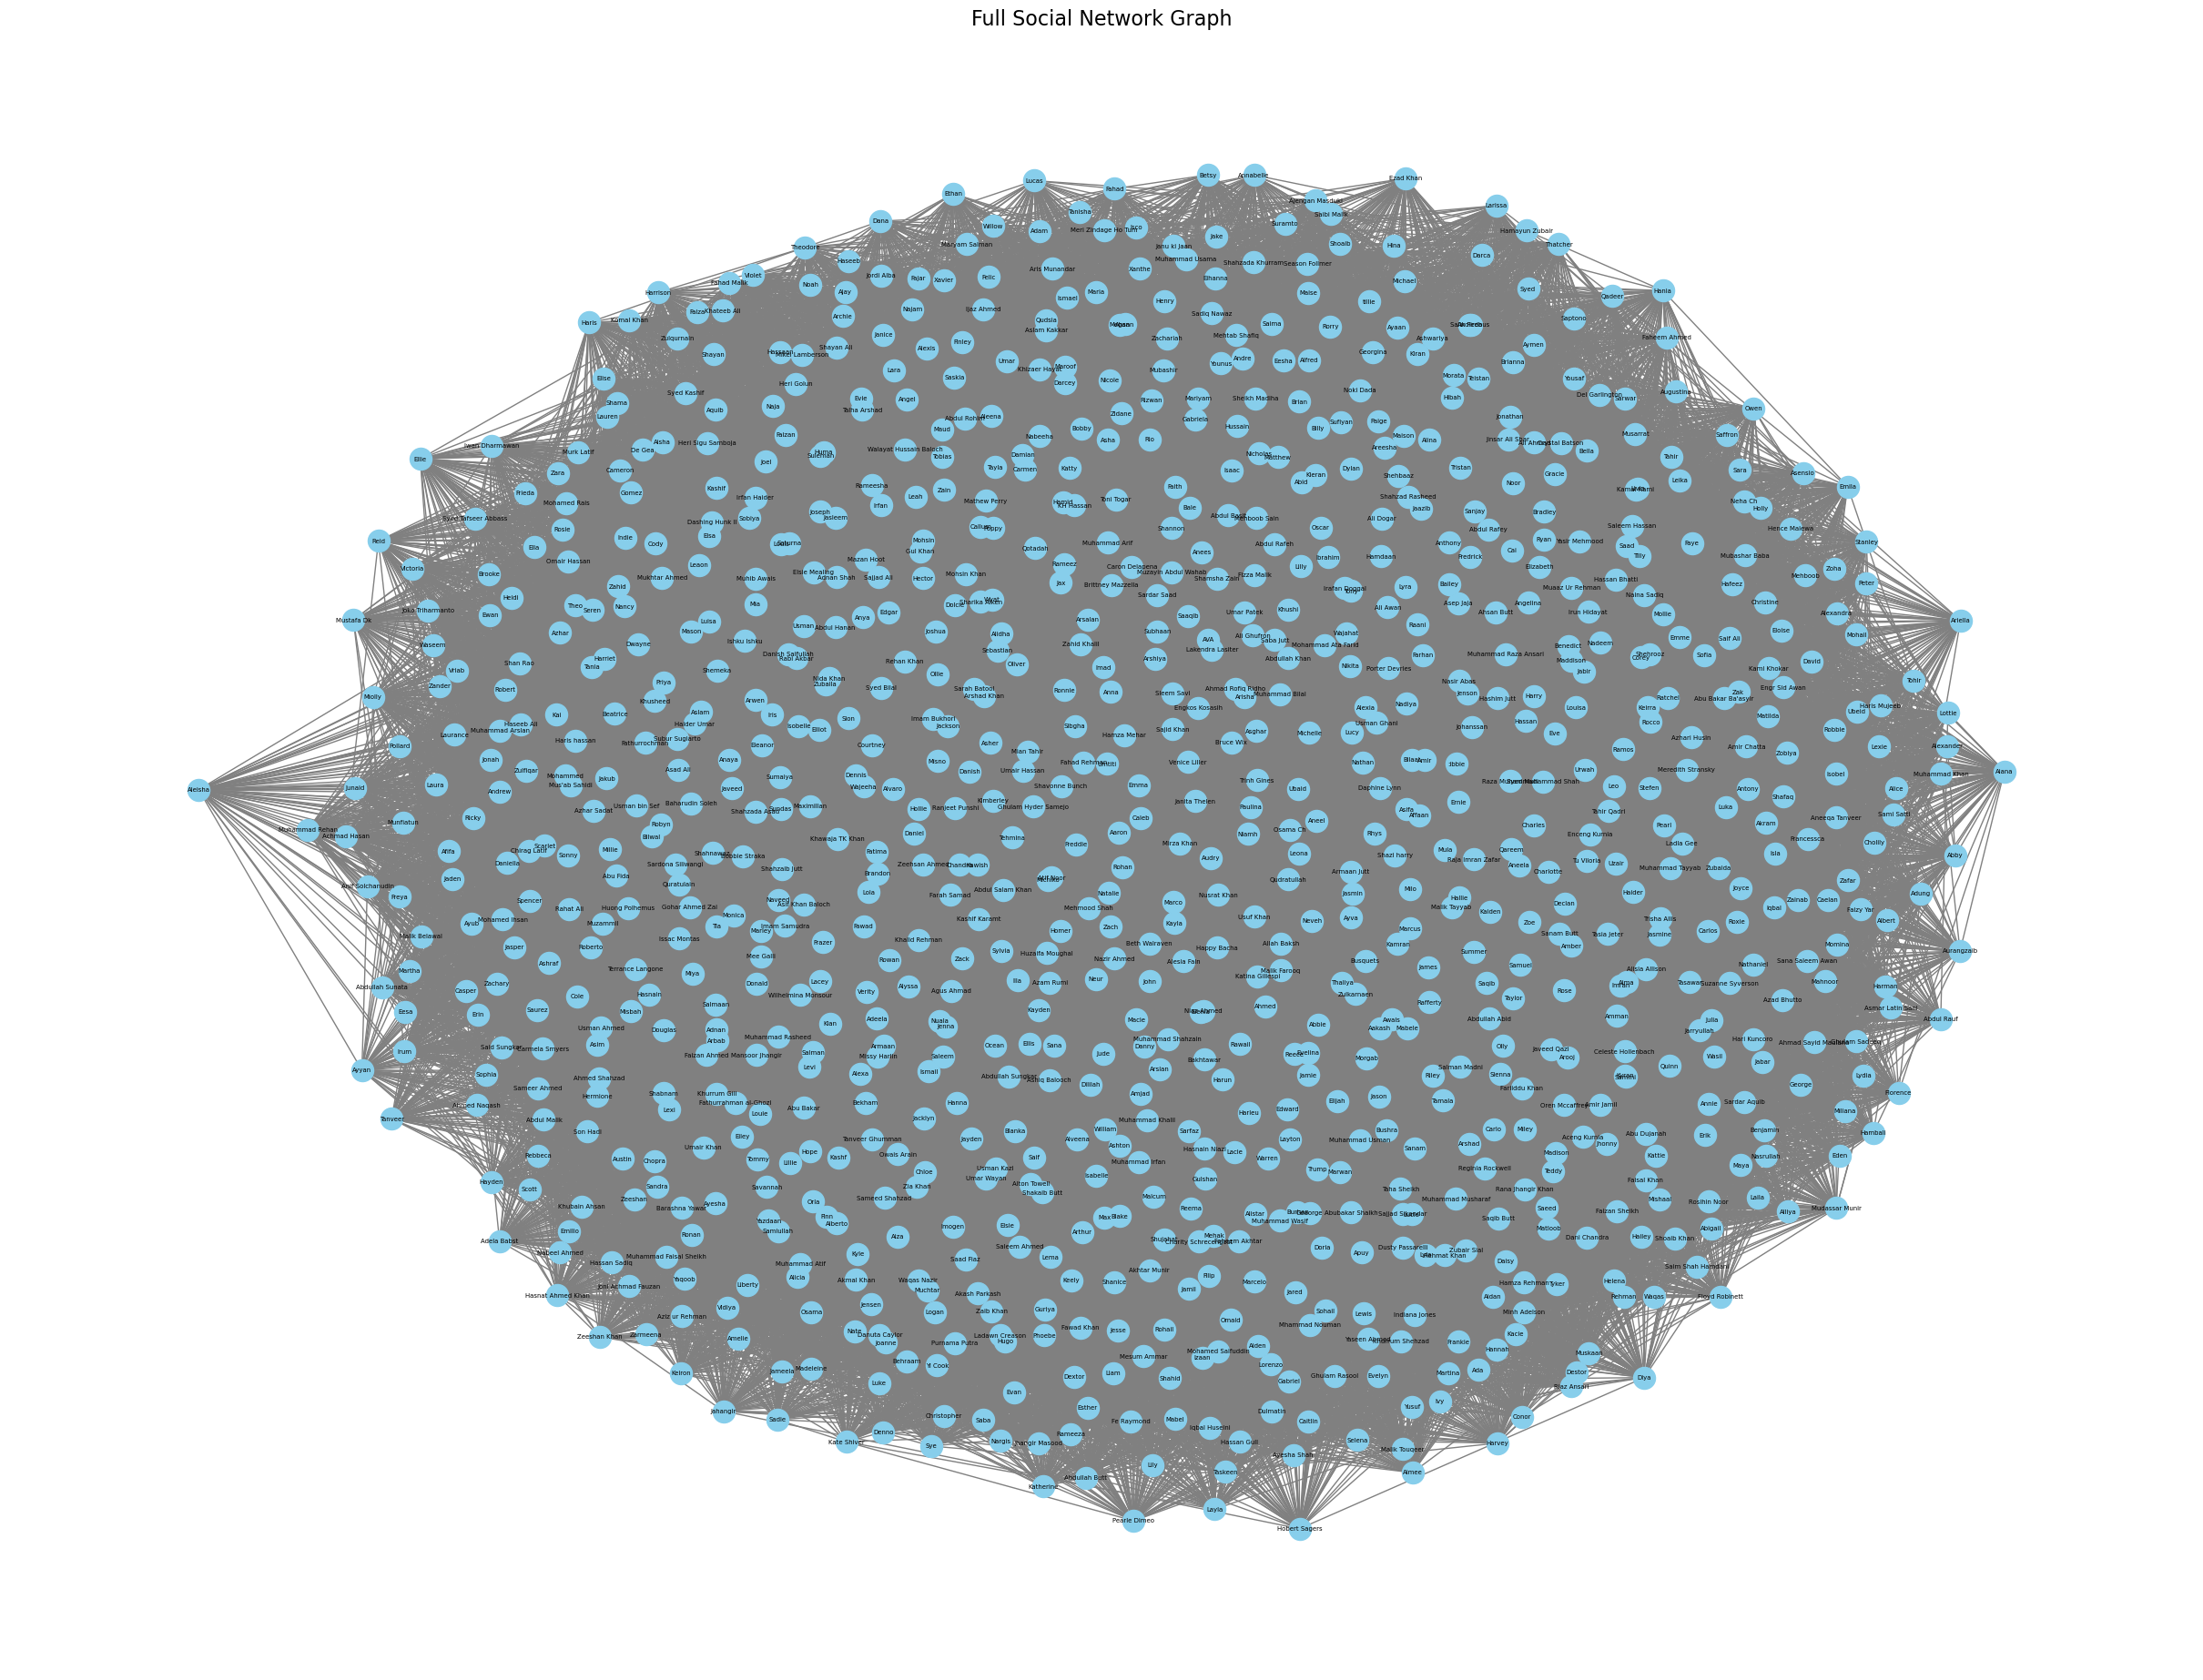

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
G = nx.Graph()
for u, neighbors in adj_list.items():
    for v in neighbors:
        G.add_edge(u, v)

# Use spring layout for better spacing
plt.figure(figsize=(24, 18))
pos = nx.spring_layout(G, k=0.15)  # Adjust k for spacing

nx.draw(
    G, pos,
    with_labels=True,
    node_color='skyblue',
    edge_color='gray',
    node_size=300,
    font_size=5
)

plt.title("Full Social Network Graph", fontsize=16)
plt.show()


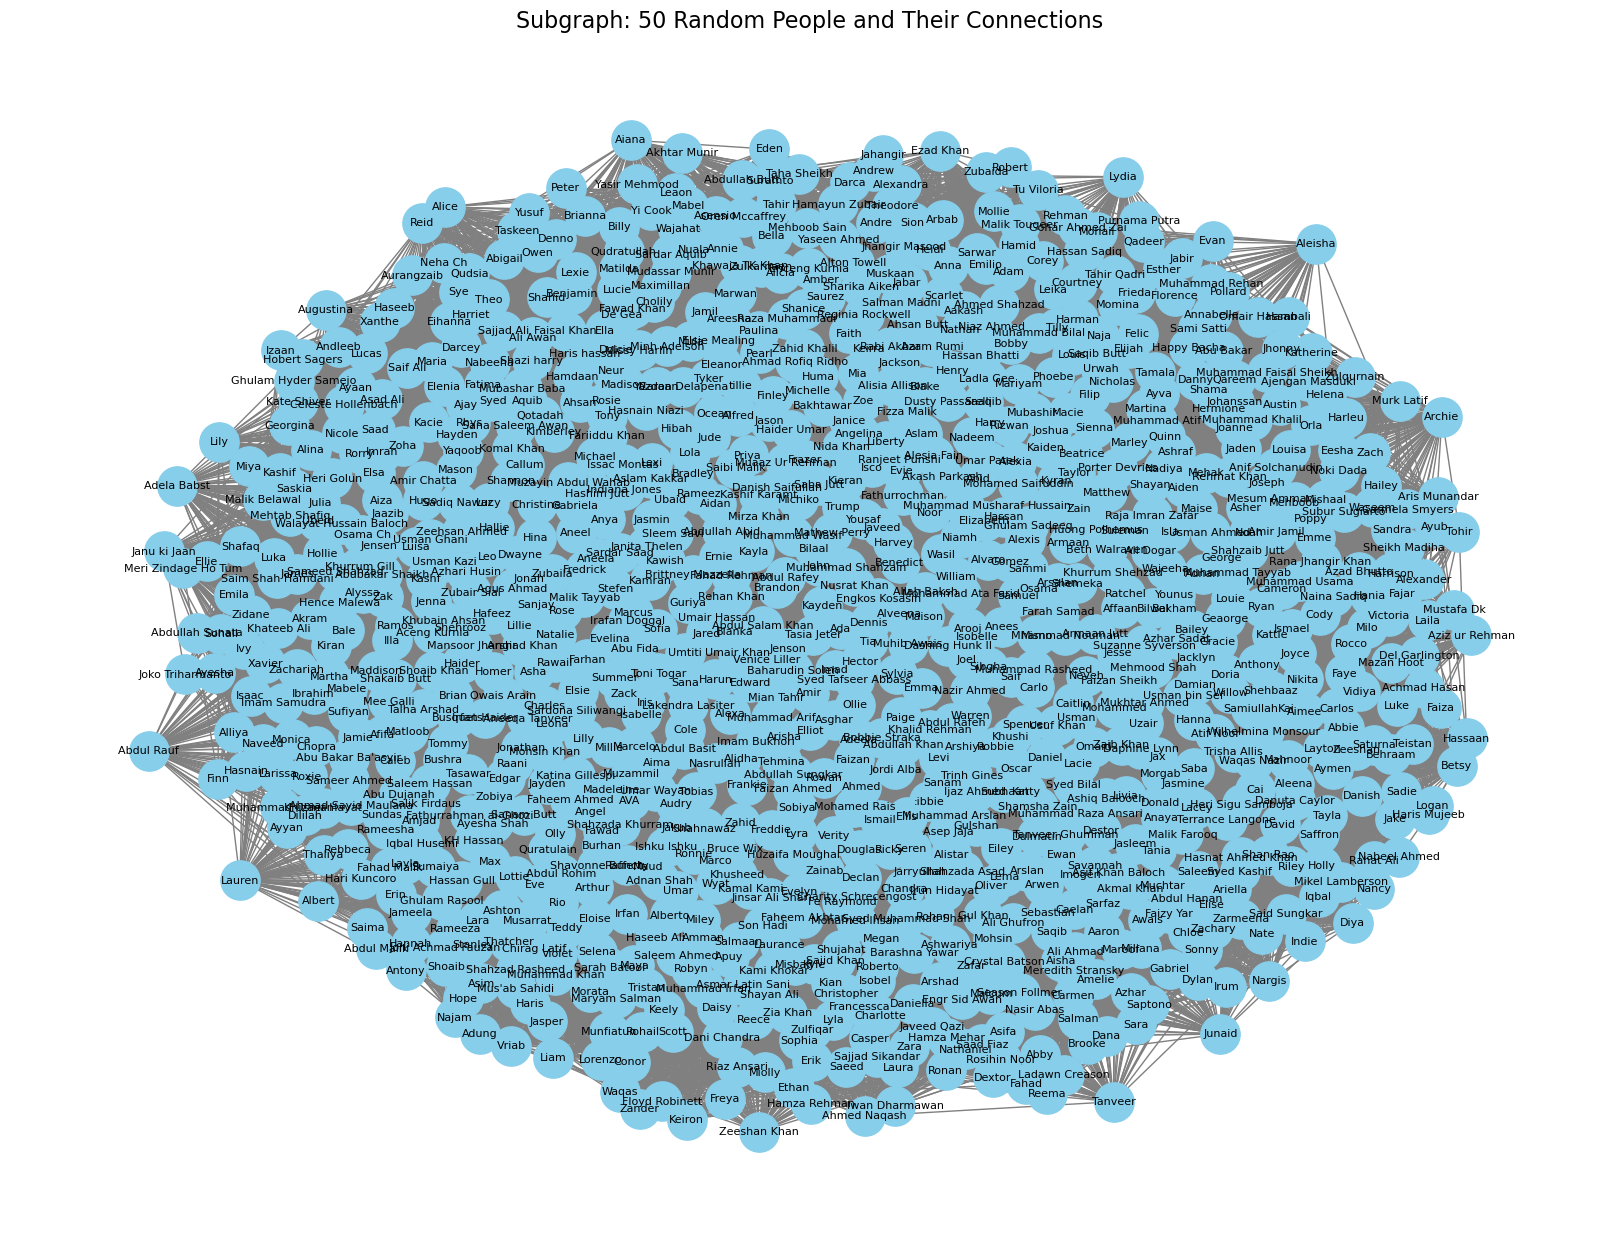

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Build full graph
G = nx.Graph()
for u, neighbors in adj_list.items():
    for v in neighbors:
        G.add_edge(u, v)

# Choose 50 random people
sample_nodes = random.sample(list(G.nodes()), 50)

# Include their neighbors (friends) too
nodes_to_draw = set(sample_nodes)
for node in sample_nodes:
    nodes_to_draw.update(G.neighbors(node))

# Create subgraph
H = G.subgraph(nodes_to_draw)

# Draw subgraph
plt.figure(figsize=(16, 12))
pos = nx.spring_layout(H, k=0.3)

nx.draw(
    H, pos,
    with_labels=True,
    node_color='skyblue',
    edge_color='gray',
    node_size=800,
    font_size=8
)

plt.title("Subgraph: 50 Random People and Their Connections", fontsize=16)
plt.show()


In [17]:
!pip install python-louvain


     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     ----- ------------------------------- 30.7/204.6 kB 435.7 kB/s eta 0:00:01
     ---------------------- --------------- 122.9/204.6 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 204.6/204.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=88325fc8a062cff5afec5d1b9c01d03fbe4bfb84500546b67f0264e1f06c249b
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\11\c1\e7\f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain


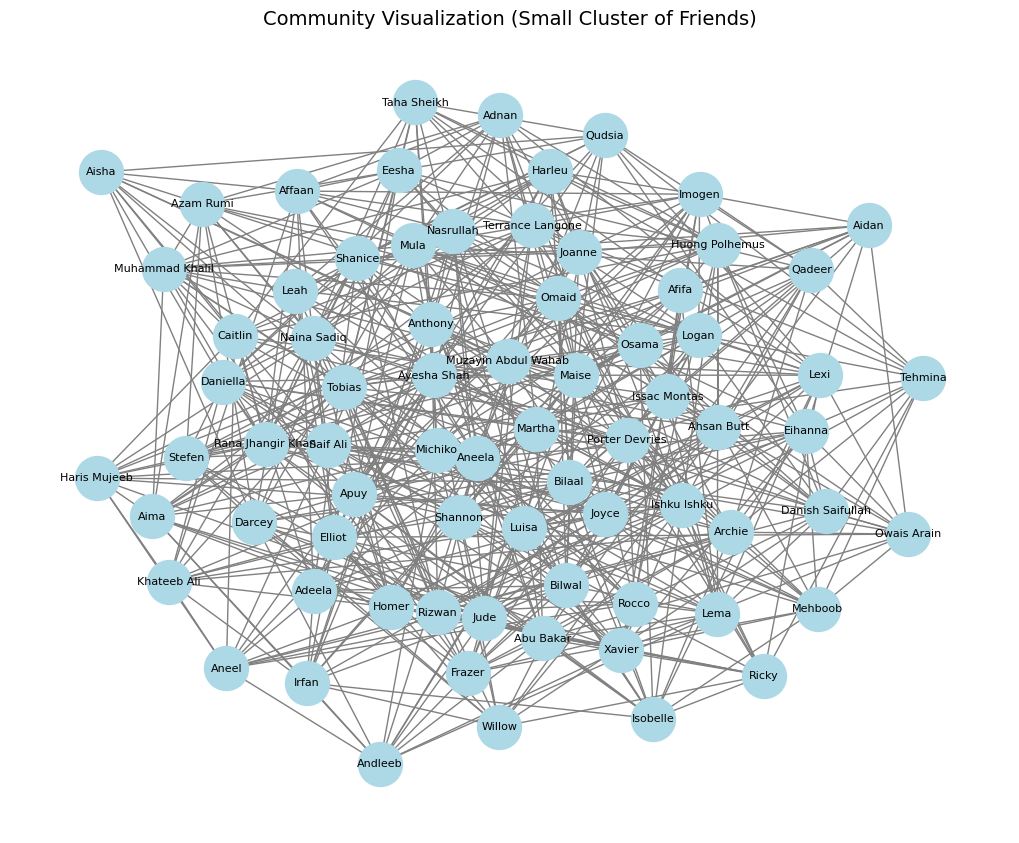

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain  # Make sure to install python-louvain
# pip install python-louvain

# Build full graph
G = nx.Graph()
for u, neighbors in adj_list.items():
    for v in neighbors:
        G.add_edge(u, v)

# Detect communities
partition = community_louvain.best_partition(G)

# Group nodes by community
from collections import defaultdict
communities = defaultdict(list)
for node, comm_id in partition.items():
    communities[comm_id].append(node)

# Choose the smallest or a small community (20–30 members)
small_community_nodes = min(communities.values(), key=len)
# Optional: use a larger one if the smallest is too small
if len(small_community_nodes) < 10:
    small_community_nodes = sorted(communities.values(), key=len)[1]  # pick next smallest

# Create subgraph for that community
H = G.subgraph(small_community_nodes)

# Draw
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(H, seed=42)
nx.draw(
    H, pos,
    with_labels=True,
    node_color='lightblue',
    edge_color='gray',
    node_size=1000,
    font_size=8
)
plt.title("Community Visualization (Small Cluster of Friends)", fontsize=14)
plt.show()


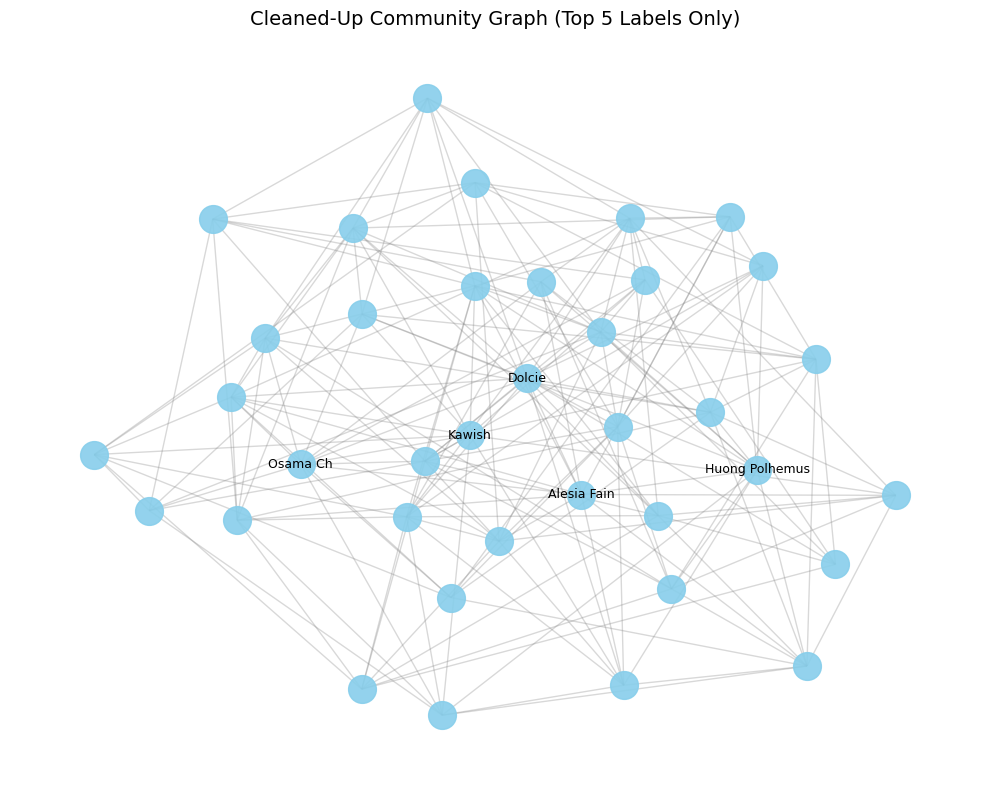

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain  # after installing python-louvain
from collections import defaultdict

# Build full graph
G = nx.Graph()
for u, neighbors in adj_list.items():
    for v in neighbors:
        G.add_edge(u, v)

# Detect communities
partition = community_louvain.best_partition(G)

# Group nodes by community
communities = defaultdict(list)
for node, comm_id in partition.items():
    communities[comm_id].append(node)

# Choose a small but not tiny community
small_community_nodes = min(communities.values(), key=len)
if len(small_community_nodes) < 10:
    small_community_nodes = sorted(communities.values(), key=len)[1]  # next smallest

# Subgraph for selected community
H = G.subgraph(small_community_nodes)

# Positioning with more spacing
pos = nx.spring_layout(H, seed=42, k=0.5)  # increase k for more spacing

# Node degrees for labeling
degree_dict = dict(H.degree())
top_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:5]  # top 5 by degree

# Draw graph
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(H, pos, node_size=400, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(H, pos, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(H, pos, labels={n: n for n in top_nodes}, font_size=9)

plt.title("Cleaned-Up Community Graph (Top 5 Labels Only)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


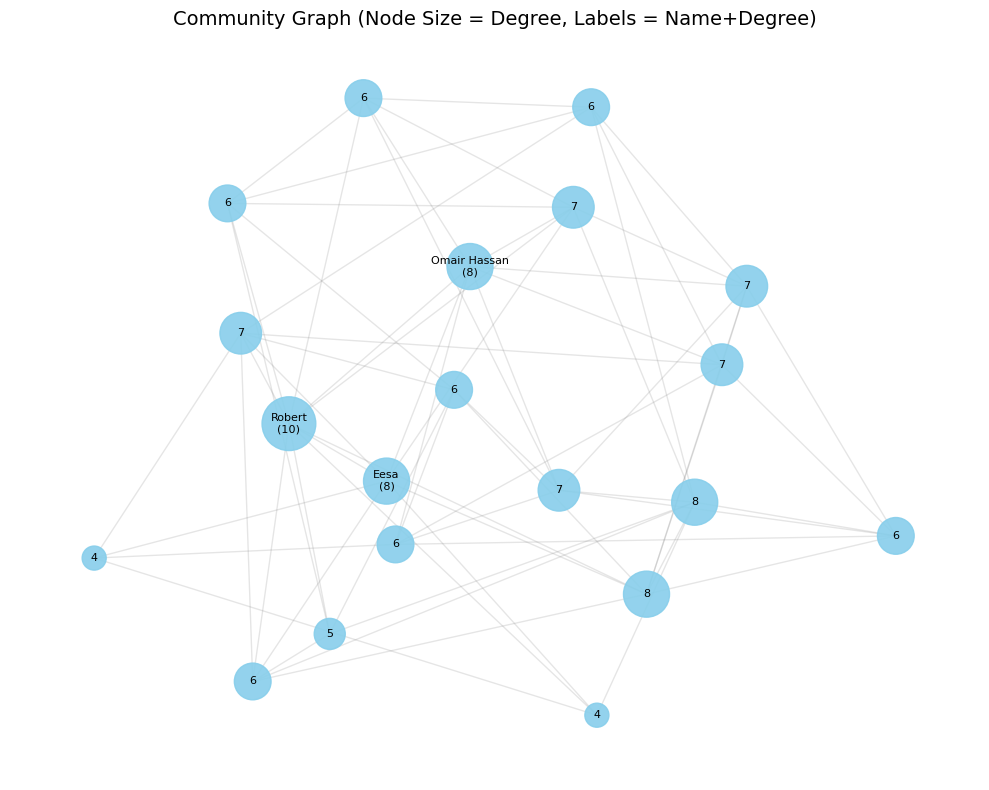

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
from collections import defaultdict
import random

# Build full graph
G = nx.Graph()
for u, neighbors in adj_list.items():
    for v in neighbors:
        G.add_edge(u, v)

# Detect communities
partition = community_louvain.best_partition(G)

# Group nodes by community
communities = defaultdict(list)
for node, comm_id in partition.items():
    communities[comm_id].append(node)

# Choose a small but not tiny community
small_community_nodes = min(communities.values(), key=len)
if len(small_community_nodes) < 10:
    small_community_nodes = sorted(communities.values(), key=len)[1]

# Optional: Subsample for clarity
max_nodes = 20
if len(small_community_nodes) > max_nodes:
    sampled_nodes = random.sample(small_community_nodes, max_nodes)
else:
    sampled_nodes = small_community_nodes

# Create subgraph and remove very low-degree nodes
H = G.subgraph(sampled_nodes).copy()
H = H.subgraph([n for n in H.nodes() if H.degree(n) >= 2])

# Layout with more spacing
pos = nx.spring_layout(H, seed=42, k=1.4)

# Node degrees
degree_dict = dict(H.degree())

# Top 3 nodes by degree
top_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:3]

# Node size scaling
min_size, max_size = 300, 1500
min_deg, max_deg = min(degree_dict.values()), max(degree_dict.values())
node_sizes = [
    min_size + (degree_dict[n] - min_deg) / (max_deg - min_deg + 0.01) * (max_size - min_size)
    for n in H.nodes()
]

# Labels showing name (if top) + degree (always)
labels = {}
for node in H.nodes():
    deg = degree_dict[node]
    if node in top_nodes:
        labels[node] = f"{node}\n({deg})"  # name + degree
    else:
        labels[node] = f"{deg}"  # only degree

# Draw graph
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color='skyblue', alpha=0.9)
nx.draw_networkx_edges(H, pos, edge_color='gray', alpha=0.2, width=1.0)
nx.draw_networkx_labels(H, pos, labels=labels, font_size=8, font_color='black')

plt.title("Community Graph (Node Size = Degree, Labels = Name+Degree)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


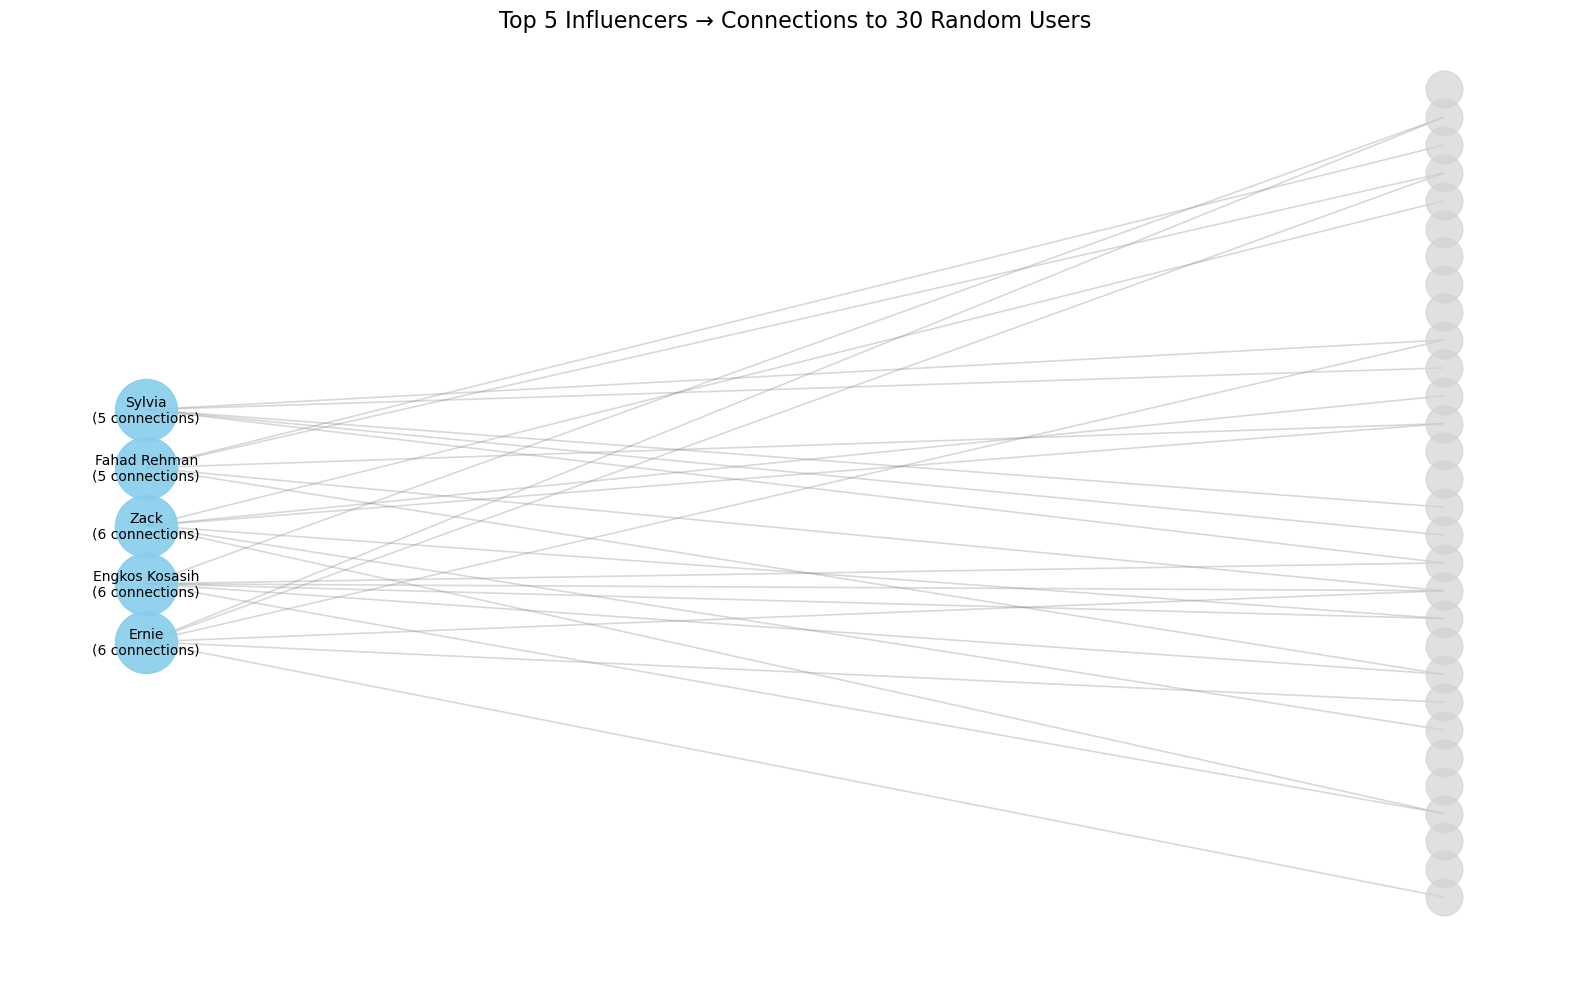

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 1: Full graph and find top 5 most connected users
G_full = nx.Graph()
for u, neighbors in adj_list.items():
    for v in neighbors:
        G_full.add_edge(u, v)

degree_dict = dict(G_full.degree())
top_5_users = sorted(degree_dict, key=degree_dict.get, reverse=True)[:5]

# Step 2: Randomly sample 30 users (excluding top 5)
remaining_users = [user for user in adj_list if user not in top_5_users]
right_users = random.sample(remaining_users, 30)

# Step 3: Build new graph
G = nx.Graph()
G.add_nodes_from(top_5_users)
G.add_nodes_from(right_users)

# Step 4: Add edges and count connections
connection_counts = {user: 0 for user in top_5_users}
for u in top_5_users:
    for v in right_users:
        if v in adj_list[u]:
            G.add_edge(u, v)
            connection_counts[u] += 1

# Step 5: Layout positions
pos = {}

# Left side (top 5): vertical middle spacing
left_y_start = -(len(top_5_users) - 1)
for i, node in enumerate(top_5_users):
    pos[node] = (-1.2, left_y_start + i * 2.5)

# Right side (30 random): moderate vertical spacing
right_y_start = -(len(right_users) / 2)
for i, node in enumerate(right_users):
    pos[node] = (1.2, right_y_start + i * 1.2)

# Step 6: Draw the graph
plt.figure(figsize=(16, 10))
nx.draw_networkx_nodes(G, pos, nodelist=top_5_users, node_color='skyblue',
                       node_size=2000, alpha=0.9)
nx.draw_networkx_nodes(G, pos, nodelist=right_users, node_color='lightgray',
                       node_size=700, alpha=0.7)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=1.2, alpha=0.3)

# Label left nodes with their right-side connection count
labels = {user: f"{user}\n({connection_counts[user]} connections)" for user in top_5_users}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

plt.title("Top 5 Influencers → Connections to 30 Random Users", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


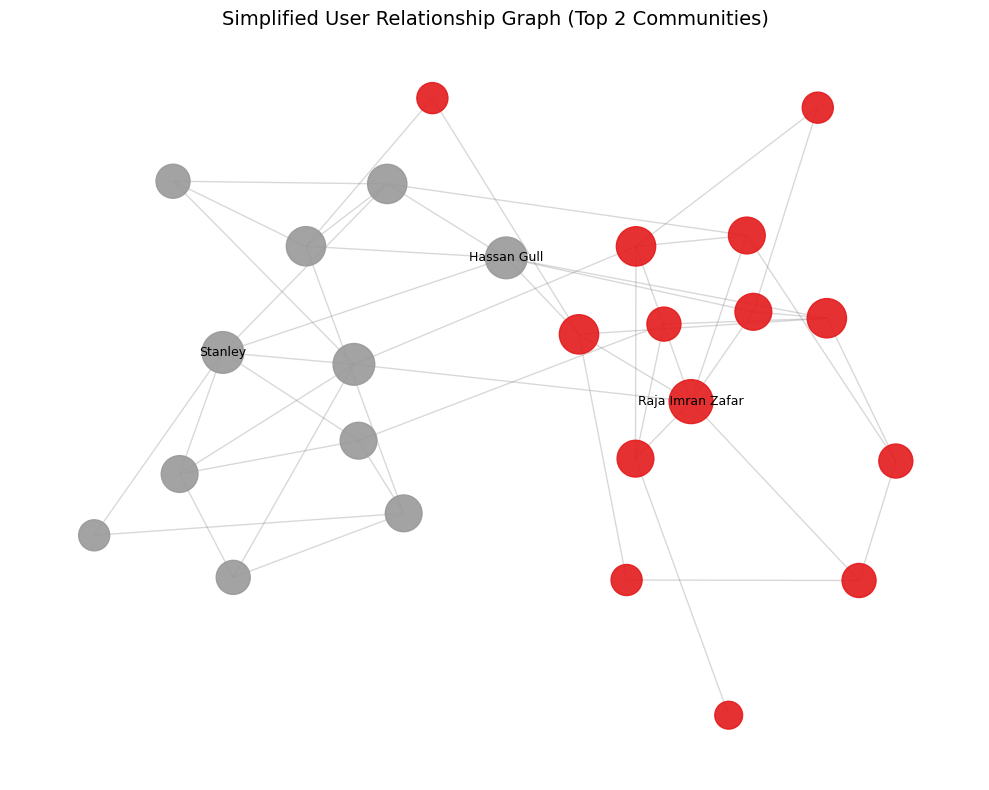

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
from collections import defaultdict
import random

# Step 1: Build full graph
G = nx.Graph()
for u, neighbors in adj_list.items():
    for v in neighbors:
        G.add_edge(u, v)

# Step 2: Sample subset of nodes (up to 60 users)
sample_size = 60
if G.number_of_nodes() > sample_size:
    sampled_nodes = random.sample(list(G.nodes()), sample_size)
else:
    sampled_nodes = list(G.nodes())
G_sub = G.subgraph(sampled_nodes).copy()

# Step 3: Community detection on subgraph
partition = community_louvain.best_partition(G_sub)
communities = defaultdict(list)
for node, comm_id in partition.items():
    communities[comm_id].append(node)

# Step 4: Keep top 2 largest communities
top_communities = sorted(communities.values(), key=len, reverse=True)[:2]
selected_nodes = [node for group in top_communities for node in group]
H = G_sub.subgraph(selected_nodes).copy()

# Step 5: Color by community
color_map = [partition[n] for n in H.nodes()]

# Step 6: Node size by degree
degree_dict = dict(H.degree())
node_sizes = [300 + degree_dict[n] * 100 for n in H.nodes()]

# Step 7: Label top 3 nodes by degree
top_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:3]
labels = {n: n for n in top_nodes}

# Step 8: Draw layout
pos = nx.spring_layout(H, seed=42, k=0.8)

plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(H, pos, node_color=color_map, cmap=plt.cm.Set1,
                       node_size=node_sizes, alpha=0.9)
nx.draw_networkx_edges(H, pos, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(H, pos, labels=labels, font_size=9)

plt.title("Simplified User Relationship Graph (Top 2 Communities)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()



In [44]:
import networkx as nx

# Build graph from your adjacency list
G = nx.Graph()
for user, friends in adj_list.items():
    for friend in friends:
        G.add_edge(user, friend)

# Compute betweenness centrality
centrality = nx.betweenness_centrality(G)

# Sort and show top 5 bridge users
top_bridges = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 Bridge Users (Betweenness Centrality):")
for user, score in top_bridges:
    print(f"{user}: {score:.4f}")


Top 5 Bridge Users (Betweenness Centrality):
Ernie: 0.0015
Engkos Kosasih: 0.0015
Sylvia: 0.0014
Zack: 0.0014
Fahad Rehman: 0.0014


In [45]:
def shortest_path_between_users(G, user1, user2):
    if nx.has_path(G, user1, user2):
        path = nx.shortest_path(G, source=user1, target=user2)
        print(f"Shortest path between '{user1}' and '{user2}':")
        print(" -> ".join(path))
    else:
        print(f"No path exists between '{user1}' and '{user2}'.")

# Example usage
shortest_path_between_users(G, "Stanley", "Gabriel")


Shortest path between 'Stanley' and 'Gabriel':
Stanley -> Rorry -> Gabriel


In [48]:
def mutual_friends(user1, user2, graph):
    friends1 = set(graph.get(user1, []))
    friends2 = set(graph.get(user2, []))
    mutuals = friends1 & friends2
    
    print(f"Mutual friends between '{user1}' and '{user2}': {len(mutuals)}")
    if mutuals:
        print(", ".join(mutuals))

# Example usage
mutual_friends("Stanley", "Gabriel", adj_list)


Mutual friends between 'Stanley' and 'Gabriel': 9
Celeste Hollenbach, Meredith Stransky, Rorry, Zia Khan, Kyran, Arshiya, Declan, Amir, Destor


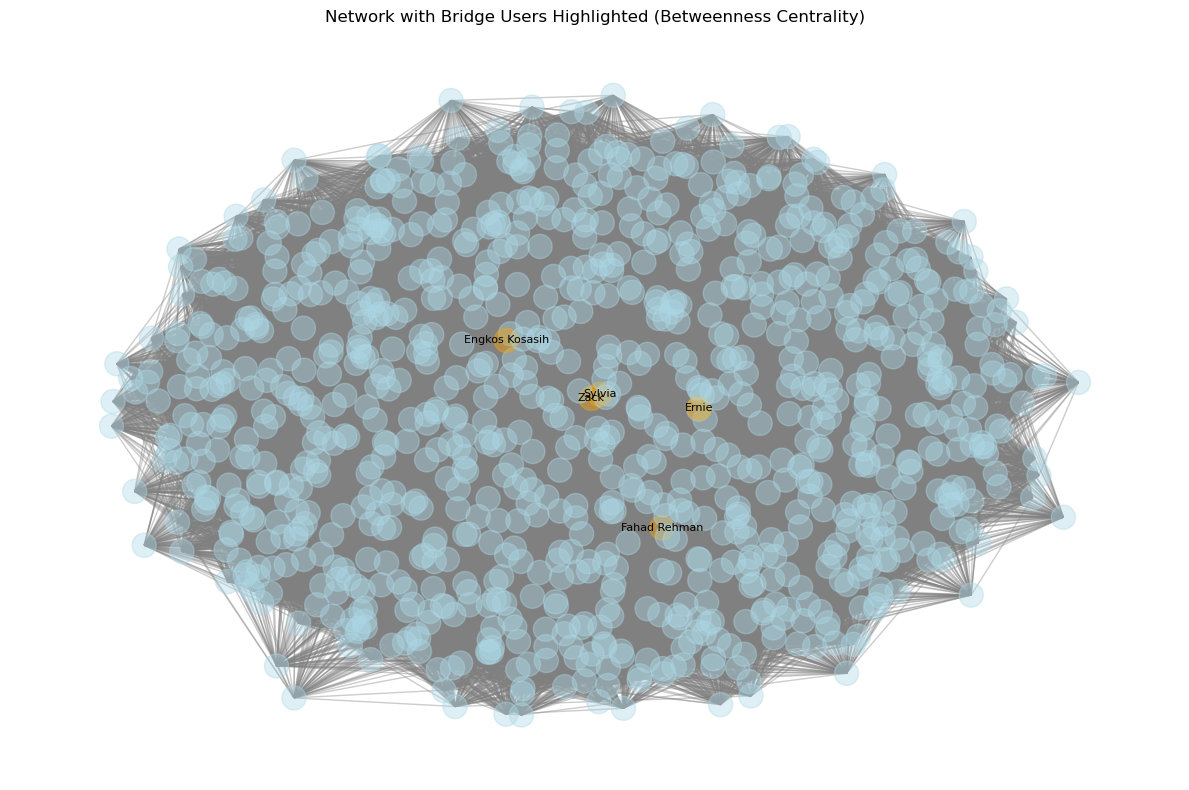

In [49]:
import matplotlib.pyplot as plt

# Layout
pos = nx.spring_layout(G, seed=42)

# Node size and color by centrality
node_sizes = [300 + 3000 * centrality[n] for n in G.nodes()]
node_colors = ["orange" if n in dict(top_bridges) else "lightblue" for n in G.nodes()]

plt.figure(figsize=(12, 8))
nx.draw_networkx(G, pos, node_size=node_sizes, node_color=node_colors, with_labels=False, edge_color='gray', alpha=0.4)
nx.draw_networkx_labels(G, pos, labels={n: n for n in dict(top_bridges)}, font_size=8)

plt.title("Network with Bridge Users Highlighted (Betweenness Centrality)")
plt.axis("off")
plt.tight_layout()
plt.show()
